In [62]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem



# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_df = pd.read_csv("mouse_drug_data.csv")
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [63]:
clinical_df = pd.read_csv("clinicaltrial_data.csv")

clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [64]:
# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")
combined_mouse_df.head()

# Display the data table for preview


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [65]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_group = combined_mouse_df.groupby(['Drug', 'Timepoint'])
Tumor_group.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1780,x773,Placebo,35,55.192736,4
1781,x773,Placebo,40,55.987676,4
1782,x773,Placebo,45,58.634971,4
1802,y478,Placebo,40,65.971120,1


In [69]:
average_tumor_group = Tumor_group.mean()
# average_tumor_group = average_tumor_group.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})

# Convert to DataFrame
average_tumor_group= pd.DataFrame(average_tumor_group)
# Preview DataFrame
average_tumor_group = average_tumor_group.reset_index()
average_tumor_group.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [67]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_group =pd.DataFrame(Tumor_group.sem())

sem_tumor_group = sem_tumor_group.reset_index()
# Convert to DataFrame
sem_tumor_group.head()
# Preview DataFrame



,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [70]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean = average_tumor_group.pivot(index="Timepoint", columns="Drug", values= "Tumor Volume (mm3)")
tumor_error = sem_tumor_group.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
print(tumor_mean.head())
print(tumor_error.head())

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  N

<IPython.core.display.Javascript object>


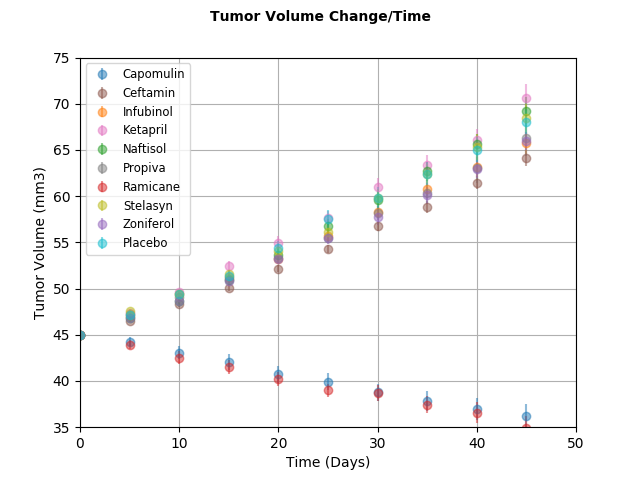

In [79]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()
fig.suptitle("Tumor Volume Change/Time", fontsize=10, fontweight="bold")
ax.errorbar(tumor_mean.index, tumor_mean["Capomulin"], tumor_error["Capomulin"], fmt="o", color="tab:blue", alpha=0.5, label="Capomulin")
ax.errorbar(tumor_mean.index, tumor_mean["Ceftamin"], tumor_error["Ceftamin"], fmt="o", color="tab:brown", alpha=0.5, label="Ceftamin")
ax.errorbar(tumor_mean.index, tumor_mean["Infubinol"], tumor_error["Infubinol"], fmt="o", color="tab:orange", alpha=0.5, label="Infubinol")
ax.errorbar(tumor_mean.index, tumor_mean["Ketapril"], tumor_error["Ketapril"], fmt="o", color="tab:pink", alpha=0.5, label="Ketapril")
ax.errorbar(tumor_mean.index, tumor_mean["Naftisol"], tumor_error["Naftisol"], fmt="o", color="tab:green", alpha=0.5, label="Naftisol")
ax.errorbar(tumor_mean.index, tumor_mean["Propriva"], tumor_error["Propriva"], fmt="o", color="tab:gray", alpha=0.5, label="Propiva")
ax.errorbar(tumor_mean.index, tumor_mean["Ramicane"], tumor_error["Ramicane"], fmt="o", color="tab:red", alpha=0.5, label="Ramicane")
ax.errorbar(tumor_mean.index, tumor_mean["Stelasyn"], tumor_error["Stelasyn"], fmt="o", color="tab:olive", alpha=0.5, label="Stelasyn")
ax.errorbar(tumor_mean.index, tumor_mean["Zoniferol"], tumor_error["Zoniferol"], fmt="o", color="tab:purple", alpha=0.5, label="Zoniferol")
ax.errorbar(tumor_mean.index, tumor_mean["Placebo"], tumor_error["Placebo"], fmt="o", color="tab:cyan", alpha=0.5, label="Placebo")

ax.set_xlim(0, 50)
ax.set_ylim(35, 75)
ax.set_xlabel ("Time (Days)")
ax.set_ylabel ("Tumor Volume (mm3)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
plt.show()
# Save the Figure



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)